## CHARTING CRYPTO: BITCOIN PRICE PREDICTION USING MACHINE LEARNING

#### - Manasa  P (21WU0101055)

In [ ]:
## INITIAL IMPLEMENTATION :

In [55]:
# requirements

pip install pandas_ta

     -------------------------------------- 115.1/115.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=d623c3dac82bfeaed4b2c832af7ee45193c13e658dfe6825c7b528e46469b783
  Stored in directory: c:\users\manas\appdata\local\pip\cache\wheels\1e\5c\47\759b32beb377aee150eb4c1f1b2b7635032cc19ea09ce076fd
Successfully built pandas_ta
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install cryptocompare

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cryptocompare: filename=cryptocompare-0.7.6-py3-none-any.whl size=6289 sha256=77ec2d3a49fbf00308fd10ff320481ba34ac747916b1af5c9e560fc78e9d2f81
  Stored in directory: c:\users\manas\appdata\local\pip\cache\wheels\2d\12\b4\583c3e2ba3d1332db7ff08d0aca4d08d17b69ed1e53fc3d5f9
Successfully built cryptocompare
Note: you may need to restart the kernel to use updated packages.


In [6]:
# importing API
import cryptocompare

import pandas as pd
from datetime import datetime

# plotting style
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [7]:
# authentication''
cryptocompare_api_key = 'd508fade5646cb1c27f83210a18a46cb8271188d4f9890b8383696dbd3458908'

#setup API key in the cryptocompare object
cryptocompare.cryptocompare._set_api_key_parameter(cryptocompare_api_key)
print("API key is set")

API key is set


In [8]:
# fetch the raw ticker list
raw_ticker_list = cryptocompare.get_coin_list()
all_tickers = pd.DataFrame.from_dict(raw_ticker_list).T

# display
all_tickers.iloc[:, :5].tail()

,Id,Url,ImageUrl,ContentCreatedOn,Name
TIA,953994,/coins/tia/overview,/media/44154182/tia.png,1698224303,TIA
EURC,949591,/coins/eurc/overview,/media/40484601/euroc.png,1656425758,EURC
NEUTRON,5301,/coins/neutron/overview,/media/12318281/ntrn.png,1430209639,NEUTRON
NTRN,954001,/coins/ntrn/overview,/media/44154185/ntrn.png,1698328190,NTRN
SD,947525,/coins/sd/overview,/media/44154187/sd.png,1648651524,SD


In [9]:

ticker_symbol = 'BTC'
currency = 'USD'
limit_value = 2000
exchange_name = 'CCCAGG'
data_before_timestamp = datetime(2023, 5, 1, 0, 0)

In [10]:
# fetching raw price data (dictionary)
raw_price_data = \
    cryptocompare.get_historical_price_hour(
        ticker_symbol,
        currency,
        limit=limit_value,
        exchange=exchange_name,
        toTs=data_before_timestamp
    )

hour_price_data = pd.DataFrame.from_dict(raw_price_data)



# setting time columns as index and converting it to datetime
hour_price_data.set_index("time", inplace=True)
hour_price_data.index = pd.to_datetime(hour_price_data.index, unit='s')
hour_price_data['datetimes'] = hour_price_data.index
hour_price_data['datetimes'] = hour_price_data['datetimes'].dt.strftime(
    '%Y-%m-%d')


hour_price_data.iloc[:, :6].apply(lambda x: x.value_counts().index[0]).reset_index(name='val')

,index,val
0,high,27420.47
1,low,24585.31
2,open,28041.52
3,volumefrom,996.75
4,volumeto,11056684.03
5,close,23264.65


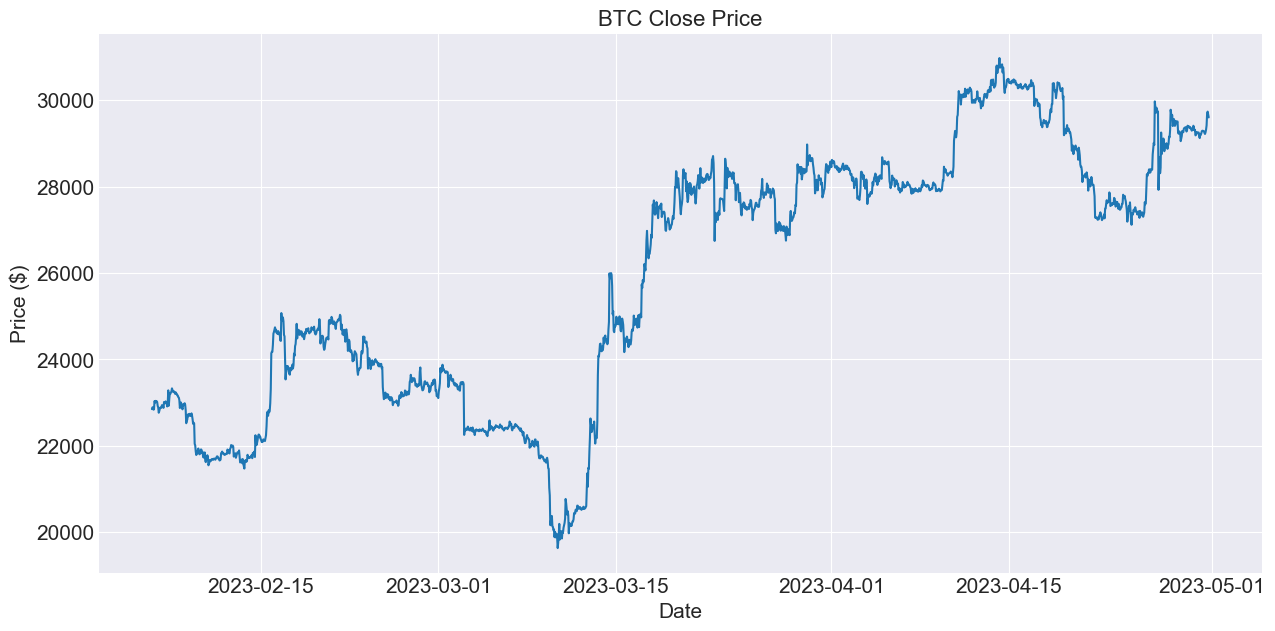

In [44]:
# plotting the close price

plt.figure(figsize=(15, 7))
plt.plot(hour_price_data.close)



plt.title('BTC Close Price', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.tick_params(axis='both', labelsize=15)

plt.show()

In [37]:
# daily data
cryptocompare.get_historical_price_day(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)

# hourly data
cryptocompare.get_historical_price_hour(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)
# minute data
cryptocompare.get_historical_price_minute(ticker_symbol, currency, limit=limit_value, exchange=exchange_name, toTs=data_before_timestamp)


[ERROR] Minute data for BTC-USD is only available for the last 7 days.


In [45]:
hour_price_data.isna()

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,datetimes
time,,,,,,,,,
2023-02-06 10:00:00,False,False,False,False,False,False,False,False,False
2023-02-06 11:00:00,False,False,False,False,False,False,False,False,False
2023-02-06 12:00:00,False,False,False,False,False,False,False,False,False
2023-02-06 13:00:00,False,False,False,False,False,False,False,False,False
2023-02-06 14:00:00,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2023-04-30 14:00:00,False,False,False,False,False,False,False,False,False
2023-04-30 15:00:00,False,False,False,False,False,False,False,False,False
2023-04-30 16:00:00,False,False,False,False,False,False,False,False,False


In [46]:
hour_price_data.head(5)

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol,datetimes
time,,,,,,,,,
2023-02-06 10:00:00,22869.24,22818.37,22838.33,484.09,11056684.03,22846.09,direct,,2023-02-06
2023-02-06 11:00:00,22893.47,22750.25,22846.09,1682.51,38372985.40,22883.77,direct,,2023-02-06
2023-02-06 12:00:00,22929.45,22840.15,22883.77,1343.02,30737431.13,22890.50,direct,,2023-02-06
2023-02-06 13:00:00,22922.12,22821.23,22890.50,982.26,22461114.30,22833.00,direct,,2023-02-06
2023-02-06 14:00:00,22893.67,22787.93,22833.00,2589.24,59115200.55,22840.64,direct,,2023-02-06


In [47]:
hour_price_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2001 entries, 2023-02-06 10:00:00 to 2023-04-30 18:00:00
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   high              2001 non-null   float64
 1   low               2001 non-null   float64
 2   open              2001 non-null   float64
 3   volumefrom        2001 non-null   float64
 4   volumeto          2001 non-null   float64
 5   close             2001 non-null   float64
 6   conversionType    2001 non-null   object 
 7   conversionSymbol  2001 non-null   object 
 8   datetimes         2001 non-null   object 
dtypes: float64(6), object(3)
memory usage: 156.3+ KB


In [48]:
hour_price_data.isna().sum()

high                0
low                 0
open                0
volumefrom          0
volumeto            0
close               0
conversionType      0
conversionSymbol    0
datetimes           0
dtype: int64

In [52]:
hour_price_data['datetimes']

time
2023-02-06 10:00:00    2023-02-06
2023-02-06 11:00:00    2023-02-06
2023-02-06 12:00:00    2023-02-06
2023-02-06 13:00:00    2023-02-06
2023-02-06 14:00:00    2023-02-06
                          ...    
2023-04-30 14:00:00    2023-04-30
2023-04-30 15:00:00    2023-04-30
2023-04-30 16:00:00    2023-04-30
2023-04-30 17:00:00    2023-04-30
2023-04-30 18:00:00    2023-04-30
Name: datetimes, Length: 2001, dtype: object

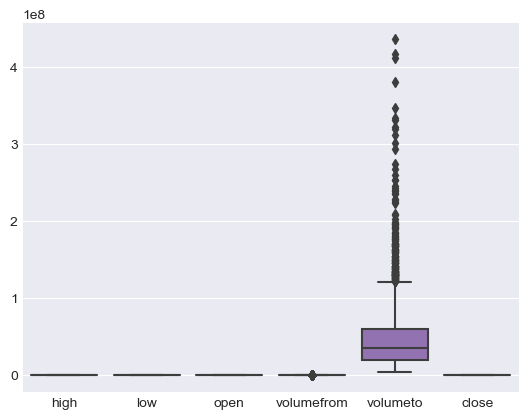

In [53]:
import seaborn as sns

sns.boxplot(data = hour_price_data, showfliers=True)
plt.show()

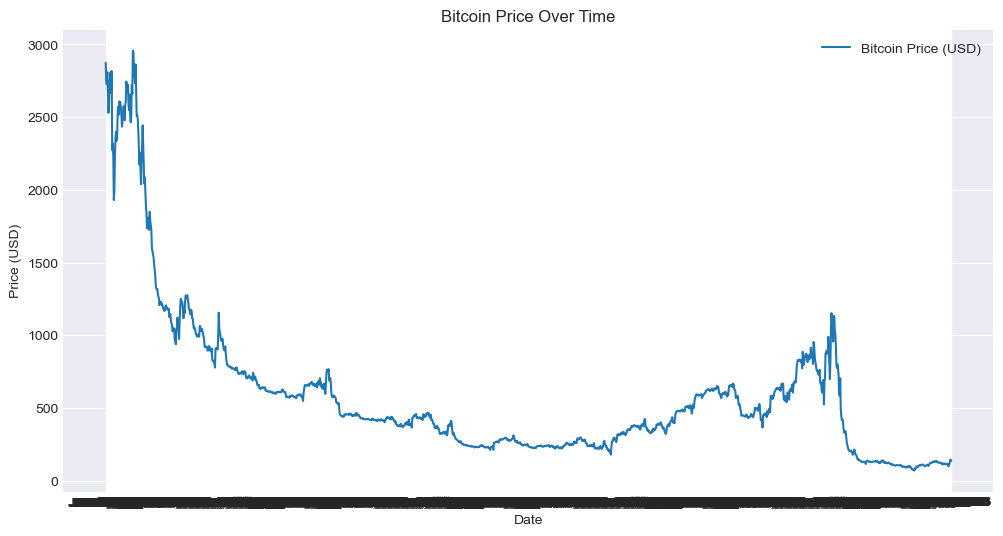

In [64]:
# Data Visualization

# plotting Bitcoin's closing price over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Bitcoin Price (USD)')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

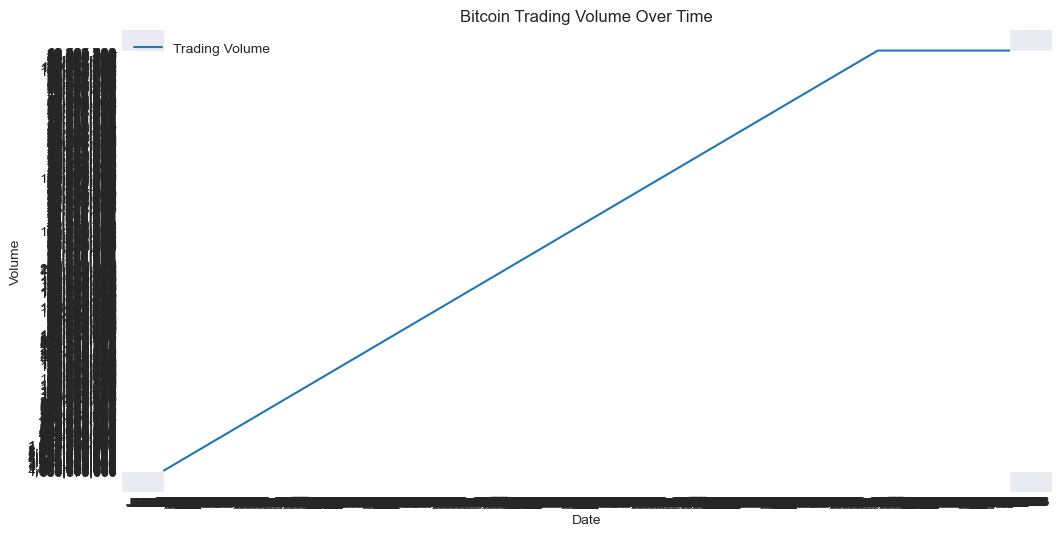

In [67]:
# Bitcoin's trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Volume'], label='Trading Volume')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

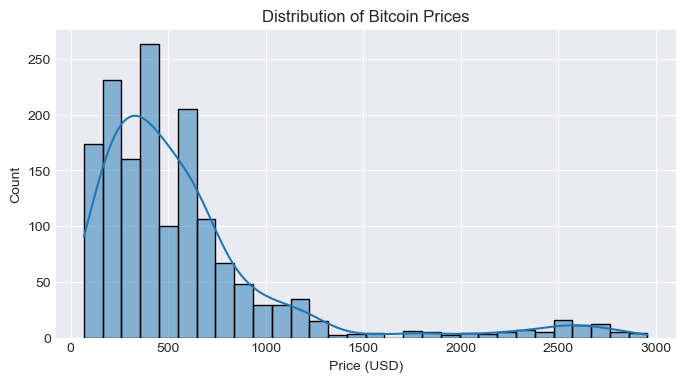

In [74]:
# distribution of Bitcoin prices
plt.figure(figsize=(8, 4))
sns.histplot(data['Close'], bins=30, kde=True)
plt.title('Distribution of Bitcoin Prices')
plt.xlabel('Price (USD)')
plt.show()

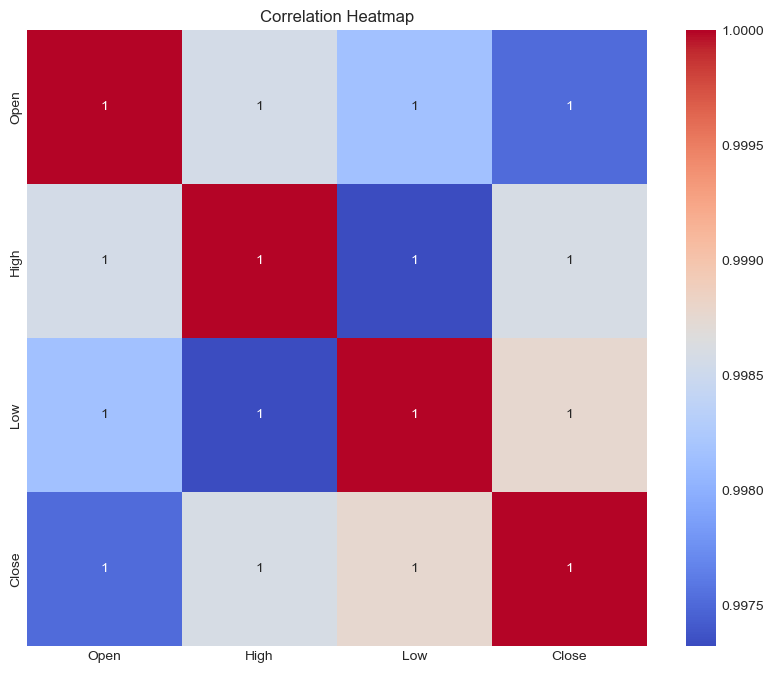

In [75]:
# correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

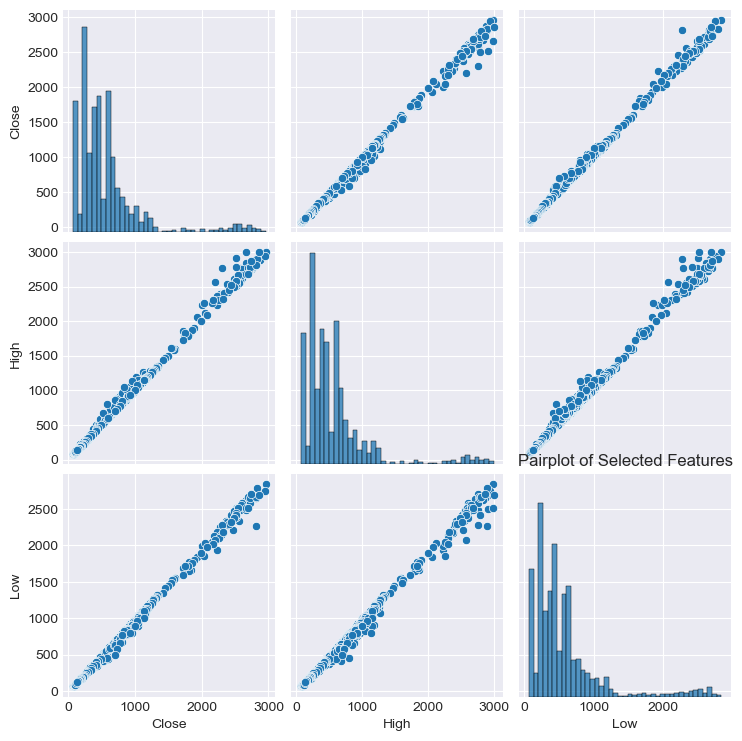

In [76]:
# pairplot 
sns.pairplot(data[['Close', 'Volume', 'High', 'Low']])
plt.title('Pairplot of Selected Features')
plt.show()

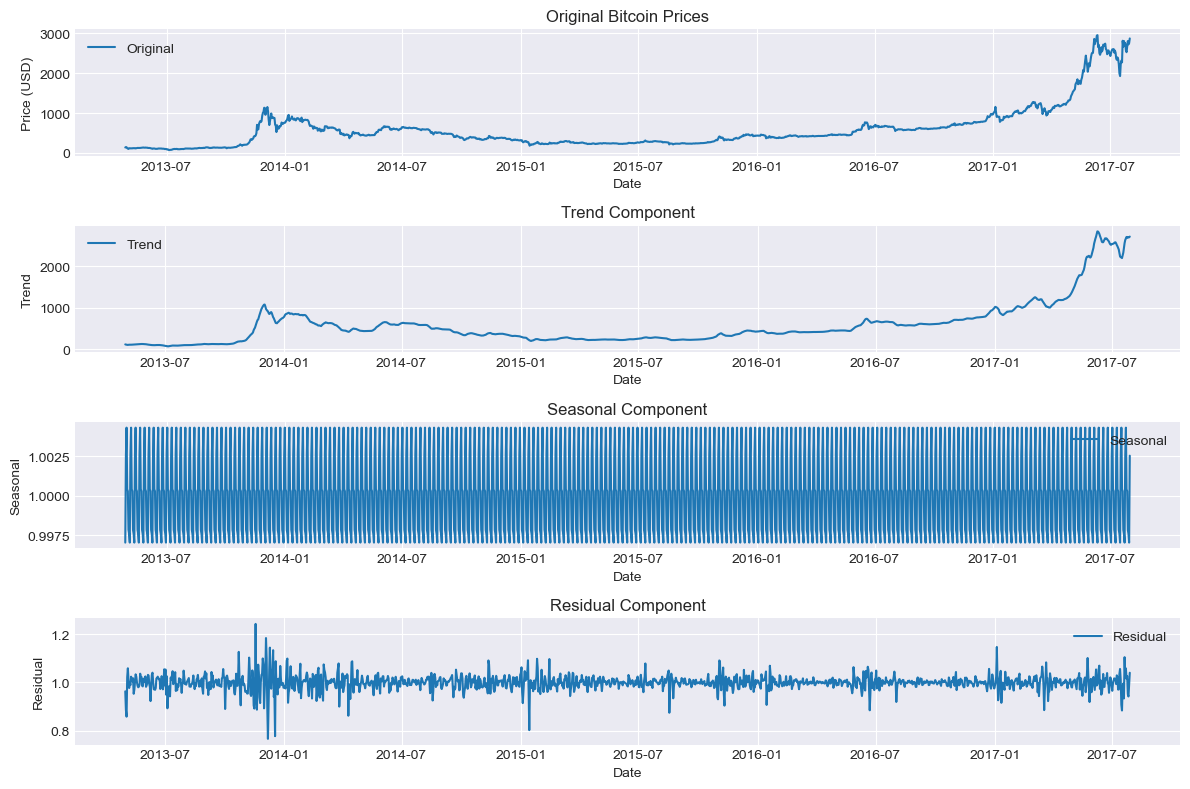

In [70]:
#Time Series Split:


import statsmodels.api as sm

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(data['Close'], model='multiplicative')

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Original Bitcoin prices
plt.subplot(4, 1, 1)
plt.plot(data['Close'], label='Original')
plt.title('Original Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()

# Residual component
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [77]:
validation_percent = 0.2
test_percent = 0.2

# indices for splitting the data
num_samples = len(data)
num_validation = int(num_samples * validation_percent)
num_test = int(num_samples * test_percent)
num_train = num_samples - num_validation - num_test

# splitting the data
train_data = data.iloc[:num_train]
validation_data = data.iloc[num_train:num_train + num_validation]
test_data = data.iloc[num_train + num_validation:]



print(f'Training data points: {len(train_data)}')
print(f'Validation data points: {len(validation_data)}')
print(f'Test data points: {len(test_data)}')


Training data points: 934
Validation data points: 311
Test data points: 311
